Mounted at /content/drive
1/1 [==============================] - 1s 724ms/step
Training Bernoulli Naive Bayes for EfficientNetB4...
Performance metrics for Bernoulli Naive Bayes with EfficientNetB4:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



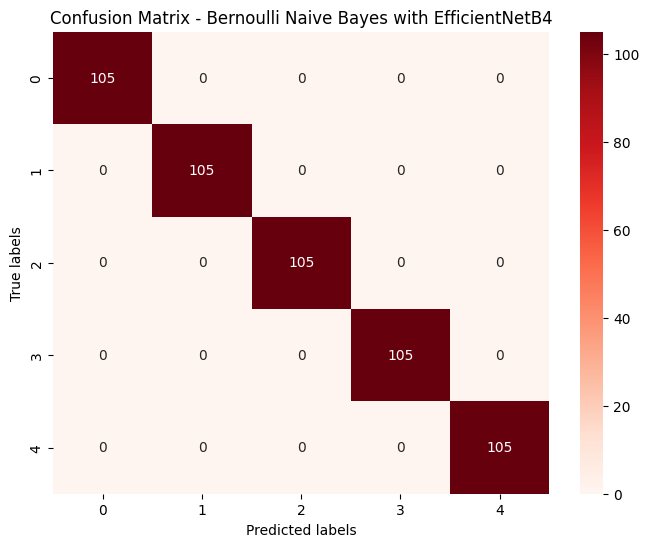

Training Multinomial Naive Bayes for EfficientNetB4...
Performance metrics for Multinomial Naive Bayes with EfficientNetB4:
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.38      0.45       105
           1       0.29      0.57      0.38       105
           2       0.57      0.15      0.24       105
           3       0.57      0.38      0.46       105
           4       0.39      0.54      0.45       105

    accuracy                           0.41       525
   macro avg       0.47      0.41      0.40       525
weighted avg       0.47      0.41      0.40       525

Accuracy: 0.4057142857142857
Sensitivity: 0.4057142857142857
Precision: 0.4749258677830106
F1 Score: 0.39709785917656



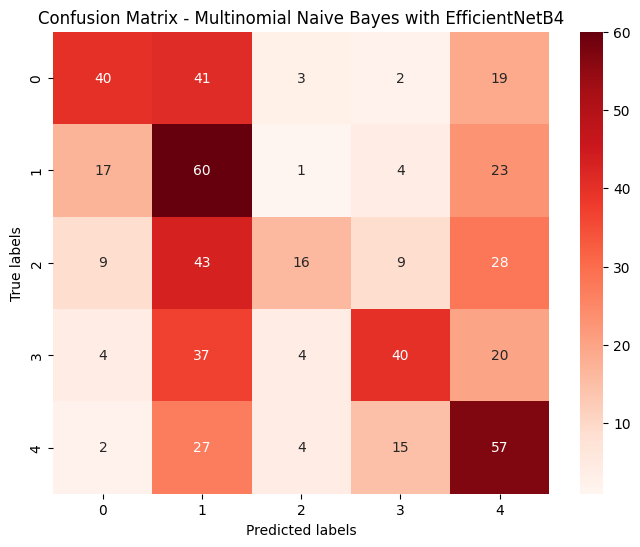

Training Complement Naive Bayes for EfficientNetB4...
Performance metrics for Complement Naive Bayes with EfficientNetB4:
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.33      0.42       105
           1       0.29      0.58      0.39       105
           2       1.00      0.05      0.09       105
           3       0.56      0.32      0.41       105
           4       0.36      0.66      0.47       105

    accuracy                           0.39       525
   macro avg       0.56      0.39      0.36       525
weighted avg       0.56      0.39      0.36       525

Accuracy: 0.38857142857142857
Sensitivity: 0.3885714285714286
Precision: 0.5591468611917275
F1 Score: 0.3562243422770016



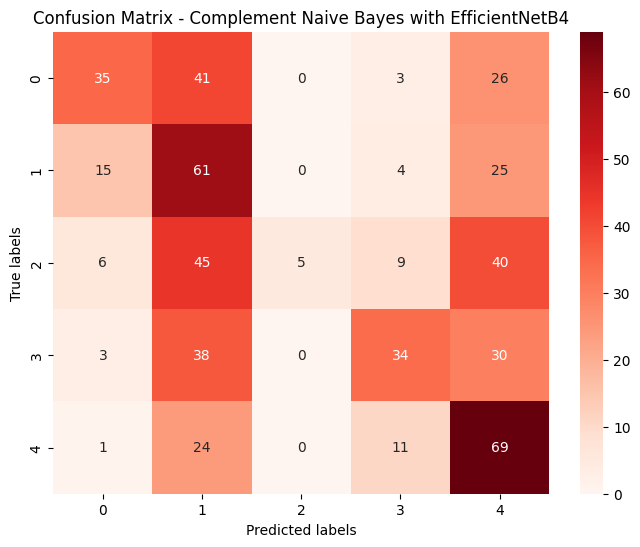

Training Gaussian Naive Bayes for EfficientNetB4...
Performance metrics for Gaussian Naive Bayes with EfficientNetB4:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       105
           1       0.48      0.93      0.63       105
           2       0.74      0.62      0.67       105
           3       0.89      0.59      0.71       105
           4       0.91      0.76      0.83       105

    accuracy                           0.70       525
   macro avg       0.77      0.70      0.71       525
weighted avg       0.77      0.70      0.71       525

Accuracy: 0.700952380952381
Sensitivity: 0.700952380952381
Precision: 0.772568338056143
F1 Score: 0.7094661562375653



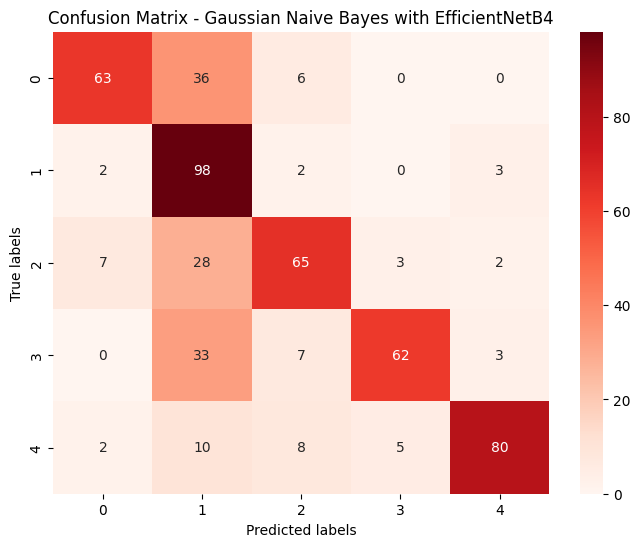

In [2]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import EfficientNetB4
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# EfficientNetB4
model_b4 = EfficientNetB4(weights='imagenet', include_top=False)

# Function to extract features from an image using EfficientNetB4
def extract_features_efficientnet_b4(img_path):
    img = image.load_img(img_path, target_size=(380, 380))  # Adjusted target size for EfficientNetB4
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_b4.predict(img_data)
    return features

# Load images and extract features for B4
x_train_b4, y_train_b4 = [], []
x_test_b4, y_test_b4 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b4(os.path.join(class_dir, img_path))
        x_train_b4.append(features)
        y_train_b4.append(i)

# Load images and extract features for B4
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b4(os.path.join(class_dir, img_path))
        x_test_b4.append(features)
        y_test_b4.append(i)

# Flatten the features for B4
x_train_flat_b4 = np.array([feature.flatten() for feature in x_train_b4])
x_test_flat_b4 = np.array([feature.flatten() for feature in x_test_b4])

# Scale the input features to the range [0, 1] for B4
scaler_b4 = MinMaxScaler()
x_train_scaled_b4 = scaler_b4.fit_transform(x_train_flat_b4)
x_test_scaled_b4 = scaler_b4.transform(x_test_flat_b4)

# Ensure non-negative values for B4
min_value_b4 = np.min(np.concatenate([x_train_scaled_b4, x_test_scaled_b4]))
x_train_scaled_non_negative_b4 = x_train_scaled_b4 - min_value_b4
x_test_scaled_non_negative_b4 = x_test_scaled_b4 - min_value_b4

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for B4
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for EfficientNetB4...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b4, y_train_b4)
    # Predict on test set
    y_pred_b4 = clf.predict(x_test_scaled_non_negative_b4)
    # Print performance metrics for B4
    print(f'Performance metrics for {clf_name} with EfficientNetB4:')
    print('Classification Report:')
    print(classification_report(y_test_b4, y_pred_b4))
    # Additional performance metrics
    accuracy_b4 = metrics.accuracy_score(y_test_b4, y_pred_b4)
    sensitivity_b4 = metrics.recall_score(y_test_b4, y_pred_b4, average='macro')
    precision_b4 = metrics.precision_score(y_test_b4, y_pred_b4, average='macro')
    f1_b4 = metrics.f1_score(y_test_b4, y_pred_b4, average='macro')
    print(f'Accuracy: {accuracy_b4}')
    print(f'Sensitivity: {sensitivity_b4}')
    print(f'Precision: {precision_b4}')
    print(f'F1 Score: {f1_b4}\n')
    # Plot confusion matrix
    cm_b4 = confusion_matrix(y_test_b4, y_pred_b4)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b4, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with EfficientNetB4')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
